In [83]:
import pandas as pd

In [84]:
df = pd.read_csv(r'C:\Users\barka\OneDrive\post_data_prep_all_zones.csv')

In [85]:
df.head()

,pickup_date,weekday,time_binned,Tmax,Tmin,Tavg,Tdep,HDD,CDD,Precipitation,new_snow,snow_depth,trip_distance,trip_time,speed,num_of_taxis,Zone
0,2019-01-01,Tuesday,00:00 - 00:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.543171,11.890650,12.167499,41,4
1,2019-01-01,Tuesday,01:00 - 01:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.842436,14.737821,11.223936,78,4
2,2019-01-01,Tuesday,02:00 - 02:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.235484,11.183333,11.346154,62,4
3,2019-01-01,Tuesday,03:00 - 03:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.640308,11.701795,12.651760,65,4
4,2019-01-01,Tuesday,04:00 - 04:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.635000,11.158889,13.186688,30,4


In [86]:
df = df.drop(df[df.trip_time < 5].index)
df = df.drop('pickup_date',axis=1)
df.reset_index(inplace=True)

In [89]:
weekday_dummy = pd.get_dummies(df['weekday'])
time_binned_dummy = pd.get_dummies(df['time_binned'])
dummies = pd.merge(left=weekday_dummy,right=time_binned_dummy,left_index=True,right_index=True)
df = pd.merge(left=dummies,right=df,left_index=True,right_index=True)
df = df.drop(['weekday','time_binned'],axis=1)

In [90]:
print(df.columns)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', '00:00 - 00:59', '01:00 - 01:59', '02:00 - 02:59',
       '03:00 - 03:59', '04:00 - 04:59', '05:00 - 05:59', '06:00 - 06:59',
       '07:00 - 07:59', '08:00 - 08:59', '09:00 - 09:59', '10:00 - 10:59',
       '11:00 - 11:59', '12:00 - 12:59', '13:00 - 13:59', '14:00 - 14:59',
       '15:00 - 15:59', '16:00 - 16:59', '17:00 - 17:59', '18:00 - 18:59',
       '19:00 - 19:59', '20:00 - 20:59', '21:00 - 21:59', '22:00 - 22:59',
       '23:00 - 23:59', 'index', 'Tmax', 'Tmin', 'Tavg', 'Tdep', 'HDD', 'CDD',
       'Precipitation', 'new_snow', 'snow_depth', 'trip_distance', 'trip_time',
       'speed', 'num_of_taxis', 'Zone'],
      dtype='object')


In [68]:
# Rearrange the cols
cols = df.columns.to_list()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [69]:
trip_time = df['trip_time'].tolist()

In [70]:
print(f'{min(trip_time)} ~ {max(trip_time)}')

5.0 ~ 62.8


In [71]:
df.head()

,Zone,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,00:00 - 00:59,01:00 - 01:59,...,Tdep,HDD,CDD,Precipitation,new_snow,snow_depth,trip_distance,trip_time,speed,num_of_taxis
0,4,0,0,0,0,0,1,0,1,0,...,13.3,16.0,0.0,0.06,0.0,0.0,2.543171,11.890650,12.167499,41
1,4,0,0,0,0,0,1,0,0,1,...,13.3,16.0,0.0,0.06,0.0,0.0,2.842436,14.737821,11.223936,78
2,4,0,0,0,0,0,1,0,0,0,...,13.3,16.0,0.0,0.06,0.0,0.0,2.235484,11.183333,11.346154,62
3,4,0,0,0,0,0,1,0,0,0,...,13.3,16.0,0.0,0.06,0.0,0.0,2.640308,11.701795,12.651760,65
4,4,0,0,0,0,0,1,0,0,0,...,13.3,16.0,0.0,0.06,0.0,0.0,2.635000,11.158889,13.186688,30


In [72]:
len(df)

566082

<AxesSubplot:>

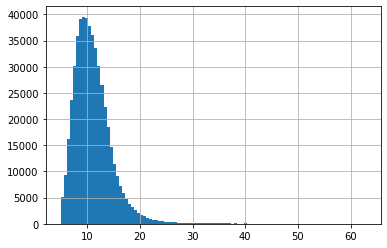

In [73]:
df['trip_time'].hist(bins=100)

In [74]:
df_1 = df.loc[(df['trip_time'] < 10)] # Less than 10 min
df_2 = df.loc[(df['trip_time'] > 10) & (df['trip_time'] < 15)] # Between 10 min and 15 min
df_3 = df.loc[(df['trip_time'] > 15)] # More than 15 min

In [75]:
path = r'C:\Users\barka\OneDrive\Final Project\Data\Manhattan\2019\Model Learning'
df_1.to_csv(path+'\less_than_10.csv',index=False)
df_2.to_csv(path+r'\between_10_and_15.csv',index=False)
df_3.to_csv(path+'\more_than_15',index=False)